# Neural network to classify digits from MNIST dataset

## Import libraries

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Prepare dataset

In [5]:
train = pd.read_csv('Data/MNIST/train.csv', dtype=np.float32)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0     0.0    ...          0.0       0.0       0.0       0.0       0.0   
1     0.0    ...          0.0       0.0       0.0       0.0       0.0   
2     0.0    ...          0.0       0.0       0.0       0.0       0.0   
3     0.0    ...          0.0       0.0       0.0       0.0       0.0   
4     0.0    ...          0.0       0.0       0.0       0.0       0.0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.0       0.0       0.0  

In [7]:
print(train.shape)
print(train.head())

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0     0.0    ...          0.0       0.0       0.0       0.0       0.0   
1     0.0    ...          0.0       0.0       0.0       0.0       0.0   
2     0.0    ...          0.0       0.0       0.0       0.0       0.0   
3     0.0    ...          0.0       0.0       0.0       0.0       0.0   
4     0.0    ...          0.0       0.0       0.0       0.0       0.0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.0      

In [8]:
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values/255 #normalization

In [9]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=43)
print(features_train.shape)
print(features_test.shape)

(33600, 784)
(8400, 784)


In [10]:
# convert Numpy array to Tensor and then to Variable
features_train_tensor = torch.from_numpy(features_train)
targets_train_tensor = torch.from_numpy(targets_train).type(torch.LongTensor)

features_test_tensor = torch.from_numpy(features_test)
targets_test_tensor = torch.from_numpy(targets_test).type(torch.LongTensor)


In [11]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [12]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(features_train_tensor,targets_train_tensor)
test = torch.utils.data.TensorDataset(features_test_tensor, targets_test_tensor)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)


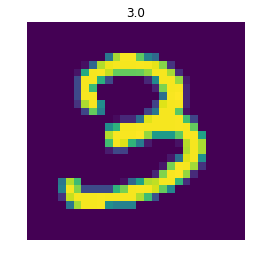

In [16]:
# visualize one of the images in data set
plt.imshow(features_numpy[14].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[14]))
# plt.savefig('graph.png')
plt.show()

## Build neural network

In [17]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()

        #Layers

        # Linear function: 1:784 => 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 => 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()

        # Linear function 3: 100 => 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()

        # Linear function 4: 100 => 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.tanh2(out)

        out = self.fc3(out)
        out = self.elu3(out)

        out = self.fc4(out)
        return out

In [18]:
input_dim = 28*28
hidden_dim = 150
output_dim = 10

net = Net(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

lr = 0.01
optim = torch.optim.SGD(net.parameters(), lr)

Iteration: 500  Loss: 0.12724421918392181  Accuracy: 95 %
Iteration: 1000  Loss: 0.25640591979026794  Accuracy: 95 %
Iteration: 1500  Loss: 0.04964130371809006  Accuracy: 95 %
Iteration: 2000  Loss: 0.09261142462491989  Accuracy: 95 %
Iteration: 2500  Loss: 0.07123851031064987  Accuracy: 95 %
Iteration: 3000  Loss: 0.10489777475595474  Accuracy: 95 %
Iteration: 3500  Loss: 0.10179970413446426  Accuracy: 95 %
Iteration: 4000  Loss: 0.08545919507741928  Accuracy: 96 %
Iteration: 4500  Loss: 0.10103487223386765  Accuracy: 96 %
Iteration: 5000  Loss: 0.03746442869305611  Accuracy: 96 %
Iteration: 5500  Loss: 0.08521278202533722  Accuracy: 96 %
Iteration: 6000  Loss: 0.0571184866130352  Accuracy: 96 %
Iteration: 6500  Loss: 0.08326879143714905  Accuracy: 96 %
Iteration: 7000  Loss: 0.11954908072948456  Accuracy: 96 %
Iteration: 7500  Loss: 0.03241879120469093  Accuracy: 96 %
Iteration: 8000  Loss: 0.07350227981805801  Accuracy: 96 %
Iteration: 8500  Loss: 0.009368925355374813  Accuracy: 96 

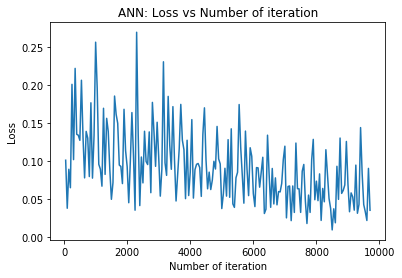

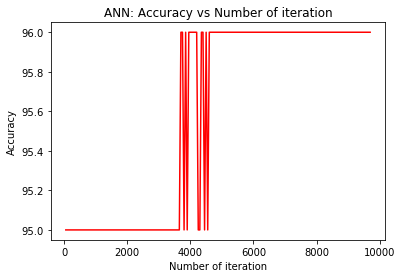

In [27]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, input_dim))
        labels = Variable(labels)

        # Clear previous gradients
        optim.zero_grad()
        # Forward propogation
        outputs = net(train)
        # Compute loss
        loss = error(outputs, labels)
        # Backward propgation
        loss.backward()
        # Update parameters
        optim.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, input_dim))
                
                # Forward propagation
                outputs = net(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()